CREDIT SCORING MODEL - CODE ALPHA INTERNSHIP

📊 STEP 1: Loading Dataset...
✓ Dataset loaded successfully!
  Shape: (1000, 21)
  Features: 20, Target: credit_risk

📋 First few rows:
  checking_account  duration credit_history purpose  credit_amount savings  \
0              A11         6            A34     A43           1169     A65   
1              A12        48            A32     A43           5951     A61   
2              A14        12            A34     A46           2096     A61   
3              A11        42            A32     A42           7882     A61   
4              A11        24            A33     A40           4870     A61   

  employment  installment_rate personal_status debtors  ...  property age  \
0        A75                 4             A93    A101  ...      A121  67   
1        A73                 2             A92    A101  ...      A121  22   
2        A74                 2             A93    A101  ...      A121  49   
3        A74                 2            

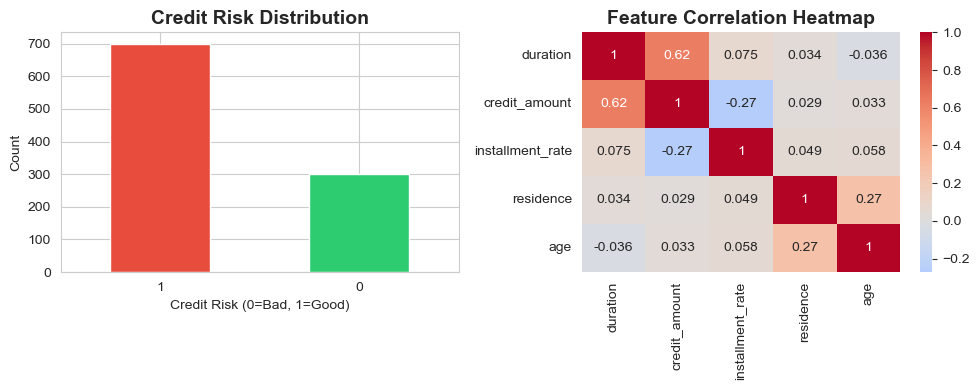



🔧 STEP 3: Feature Engineering & Preprocessing...
  Encoding 13 categorical features...
✓ Final feature matrix: (1000, 20)


✂️ STEP 4: Splitting Data...
  Training set: 800 samples
  Test set: 200 samples
✓ Features scaled using StandardScaler


🤖 STEP 5: Training Models...

  Training Logistic Regression...
    ✓ Accuracy: 0.7400

  Training Decision Tree...
    ✓ Accuracy: 0.7250

  Training Random Forest...
    ✓ Accuracy: 0.7750


📊 STEP 6: MODEL EVALUATION RESULTS

              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression     0.740   0.801370 0.835714  0.818182 0.782262
      Decision Tree     0.725   0.869565 0.714286  0.784314 0.756845
      Random Forest     0.775   0.806452 0.892857  0.847458 0.810179

✓ Saved: model_comparison_results.csv

🏆 Best Model: Random Forest


📈 STEP 7: Detailed Analysis of Random Forest...

📋 Classification Report:
              precision    recall  f1-score   support

  Bad Credit       0.67      0.50      0.57     

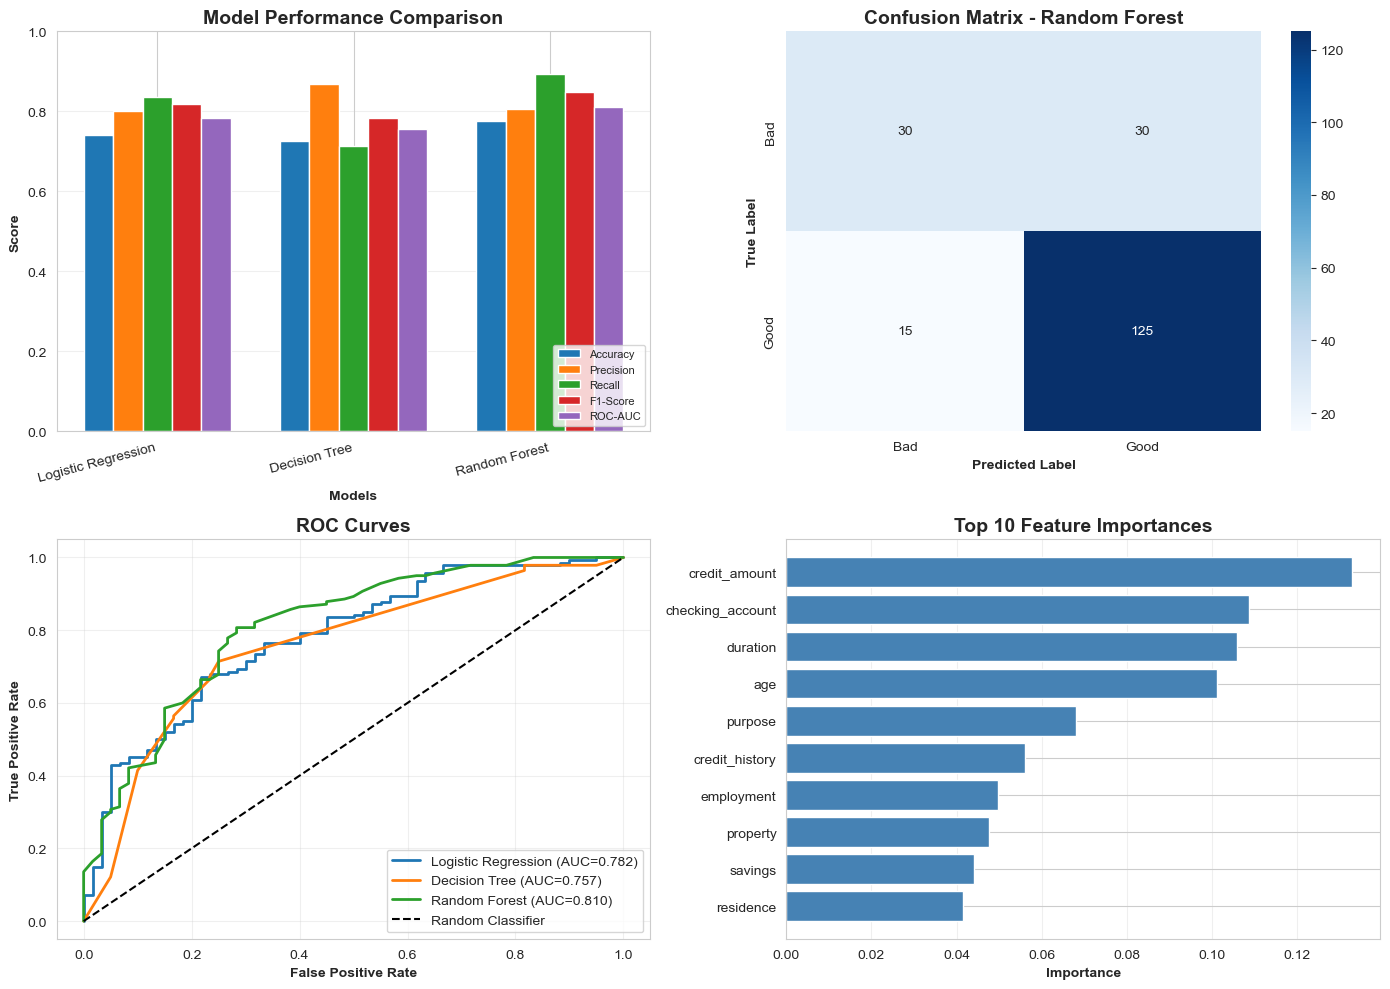



✅ TASK COMPLETED SUCCESSFULLY!

📌 Key Takeaways:
   • Best Model: Random Forest
   • Accuracy: 77.50%
   • F1-Score: 0.8475
   • ROC-AUC: 0.8102

💡 Next Steps:
   1. Try hyperparameter tuning for better performance
   2. Experiment with feature engineering
   3. Test with cross-validation
   4. Deploy the model for predictions


📁 Saving additional files...
✓ Saved: processed_credit_data.csv
✓ Saved: classification_report.txt

✅ All files saved successfully!
📂 Files created:
   • original_credit_dataset.csv
   • credit_scoring_eda.png
   • credit_scoring_model_evaluation.png
   • model_comparison_results.csv
   • processed_credit_data.csv
   • classification_report.txt


In [3]:
# Credit Scoring Model - Complete Implementation
# Task 1: Code Alpha ML Internship

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_auc_score, roc_curve, precision_recall_curve,
                             f1_score, precision_score, recall_score, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("=" * 60)
print("CREDIT SCORING MODEL - CODE ALPHA INTERNSHIP")
print("=" * 60)

# ============================================================================
# STEP 1: LOAD DATASET
# ============================================================================
print("\n📊 STEP 1: Loading Dataset...")

# Using a popular credit dataset - German Credit Data
# You can replace this with your own dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Column names for German Credit dataset
columns = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount',
           'savings', 'employment', 'installment_rate', 'personal_status', 'debtors',
           'residence', 'property', 'age', 'other_installments', 'housing',
           'existing_credits', 'job', 'dependents', 'telephone', 'foreign_worker', 'credit_risk']

try:
    df = pd.read_csv(url, sep=' ', names=columns)
    # Convert target: 1=Good, 2=Bad -> 1=Good, 0=Bad
    df['credit_risk'] = df['credit_risk'].map({1: 1, 2: 0})
    print(f"✓ Dataset loaded successfully!")
    print(f"  Shape: {df.shape}")
    print(f"  Features: {df.shape[1]-1}, Target: credit_risk")
except:
    print("⚠ Using sample synthetic data (replace with your dataset)")
    # Create synthetic data if download fails
    np.random.seed(42)
    n = 1000
    df = pd.DataFrame({
        'age': np.random.randint(18, 70, n),
        'income': np.random.randint(20000, 150000, n),
        'credit_amount': np.random.randint(1000, 50000, n),
        'duration': np.random.randint(6, 60, n),
        'existing_credits': np.random.randint(1, 5, n),
        'dependents': np.random.randint(0, 4, n),
        'credit_risk': np.random.choice([0, 1], n, p=[0.3, 0.7])
    })

print(f"\n📋 First few rows:")
print(df.head())

# Save original dataset
df.to_csv('original_credit_dataset.csv', index=False)
print("\n✓ Saved: original_credit_dataset.csv")

# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n\n📈 STEP 2: Exploratory Data Analysis...")

print(f"\n📊 Target Distribution:")
print(df['credit_risk'].value_counts())
print(f"\nGood Credit: {df['credit_risk'].sum()} ({df['credit_risk'].mean()*100:.1f}%)")
print(f"Bad Credit: {(df['credit_risk']==0).sum()} ({(1-df['credit_risk'].mean())*100:.1f}%)")

# Visualize target distribution
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['credit_risk'].value_counts().plot(kind='bar', color=['#e74c3c', '#2ecc71'])
plt.title('Credit Risk Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Credit Risk (0=Bad, 1=Good)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'credit_risk' in numeric_cols:
    numeric_cols.remove('credit_risk')
if len(numeric_cols) > 0:
    df[numeric_cols[:5]].corr().abs().values.flatten()
    sns.heatmap(df[numeric_cols[:5]].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# STEP 3: FEATURE ENGINEERING & PREPROCESSING
# ============================================================================
print("\n\n🔧 STEP 3: Feature Engineering & Preprocessing...")

# Separate features and target
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# Handle categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
if len(categorical_cols) > 0:
    print(f"  Encoding {len(categorical_cols)} categorical features...")
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

# Handle missing values
if X.isnull().sum().sum() > 0:
    print(f"  Handling missing values...")
    X = X.fillna(X.median())

print(f"✓ Final feature matrix: {X.shape}")

# ============================================================================
# STEP 4: TRAIN-TEST SPLIT & SCALING
# ============================================================================
print("\n\n✂️ STEP 4: Splitting Data...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"  Training set: {X_train.shape[0]} samples")
print(f"  Test set: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features scaled using StandardScaler")

# ============================================================================
# STEP 5: MODEL TRAINING
# ============================================================================
print("\n\n🤖 STEP 5: Training Models...")

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}

for name, model in models.items():
    print(f"\n  Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_pred_proba)
    }
    print(f"    ✓ Accuracy: {results[name]['accuracy']:.4f}")

# ============================================================================
# STEP 6: MODEL EVALUATION
# ============================================================================
print("\n\n" + "=" * 60)
print("📊 STEP 6: MODEL EVALUATION RESULTS")
print("=" * 60)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results],
    'F1-Score': [results[m]['f1'] for m in results],
    'ROC-AUC': [results[m]['roc_auc'] for m in results]
})

print("\n" + comparison_df.to_string(index=False))

# Save results to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("\n✓ Saved: model_comparison_results.csv")

# Find best model
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
print(f"\n🏆 Best Model: {best_model_name}")

# ============================================================================
# STEP 7: DETAILED EVALUATION OF BEST MODEL
# ============================================================================
print(f"\n\n📈 STEP 7: Detailed Analysis of {best_model_name}...")

best_results = results[best_model_name]

print("\n📋 Classification Report:")
print(classification_report(y_test, best_results['y_pred'], 
                           target_names=['Bad Credit', 'Good Credit']))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Model Comparison
ax1 = axes[0, 0]
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
# Map display names to actual dictionary keys
metric_map = {
    'Accuracy': 'accuracy',
    'Precision': 'precision', 
    'Recall': 'recall',
    'F1-Score': 'f1',
    'ROC-AUC': 'roc_auc'
}
x_pos = np.arange(len(results))
width = 0.15
for i, metric in enumerate(metrics_to_plot):
    values = [results[m][metric_map[metric]] for m in results]
    ax1.bar(x_pos + i*width, values, width, label=metric)
ax1.set_xlabel('Models', fontweight='bold')
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x_pos + width * 2)
ax1.set_xticklabels(results.keys(), rotation=15, ha='right')
ax1.legend(loc='lower right', fontsize=8)
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)

# 2. Confusion Matrix
ax2 = axes[0, 1]
cm = confusion_matrix(y_test, best_results['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2,
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
ax2.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
ax2.set_ylabel('True Label', fontweight='bold')
ax2.set_xlabel('Predicted Label', fontweight='bold')

# 3. ROC Curve
ax3 = axes[1, 0]
for name in results:
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    auc = results[name]['roc_auc']
    ax3.plot(fpr, tpr, label=f'{name} (AUC={auc:.3f})', linewidth=2)
ax3.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax3.set_xlabel('False Positive Rate', fontweight='bold')
ax3.set_ylabel('True Positive Rate', fontweight='bold')
ax3.set_title('ROC Curves', fontsize=14, fontweight='bold')
ax3.legend(loc='lower right')
ax3.grid(alpha=0.3)

# 4. Feature Importance (if available)
ax4 = axes[1, 1]
if hasattr(best_results['model'], 'feature_importances_'):
    importances = best_results['model'].feature_importances_
    indices = np.argsort(importances)[-10:]  # Top 10 features
    feature_names = X.columns[indices]
    ax4.barh(range(len(indices)), importances[indices], color='steelblue')
    ax4.set_yticks(range(len(indices)))
    ax4.set_yticklabels(feature_names)
    ax4.set_xlabel('Importance', fontweight='bold')
    ax4.set_title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)
elif hasattr(best_results['model'], 'coef_'):
    coef = best_results['model'].coef_[0]
    indices = np.argsort(np.abs(coef))[-10:]
    feature_names = X.columns[indices]
    ax4.barh(range(len(indices)), coef[indices], color='steelblue')
    ax4.set_yticks(range(len(indices)))
    ax4.set_yticklabels(feature_names)
    ax4.set_xlabel('Coefficient', fontweight='bold')
    ax4.set_title('Top 10 Feature Coefficients', fontsize=14, fontweight='bold')
    ax4.grid(axis='x', alpha=0.3)
else:
    ax4.text(0.5, 0.5, 'Feature importance\nnot available\nfor this model', 
             ha='center', va='center', fontsize=12)
    ax4.axis('off')

plt.tight_layout()
plt.savefig('credit_scoring_model_evaluation.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: credit_scoring_model_evaluation.png")
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print("\n\n" + "=" * 60)
print("✅ TASK COMPLETED SUCCESSFULLY!")
print("=" * 60)
print(f"\n📌 Key Takeaways:")
print(f"   • Best Model: {best_model_name}")
print(f"   • Accuracy: {best_results['accuracy']:.2%}")
print(f"   • F1-Score: {best_results['f1']:.4f}")
print(f"   • ROC-AUC: {best_results['roc_auc']:.4f}")
print(f"\n💡 Next Steps:")
print(f"   1. Try hyperparameter tuning for better performance")
print(f"   2. Experiment with feature engineering")
print(f"   3. Test with cross-validation")
print(f"   4. Deploy the model for predictions")
print("\n" + "=" * 60)

# ============================================================================
# SAVE ADDITIONAL FILES
# ============================================================================
print("\n📁 Saving additional files...")

# Save processed data
df.to_csv('processed_credit_data.csv', index=False)
print("✓ Saved: processed_credit_data.csv")

# Save detailed classification report to text file
with open('classification_report.txt', 'w') as f:
    f.write("=" * 60 + "\n")
    f.write("CREDIT SCORING MODEL - CLASSIFICATION REPORT\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Best Model: {best_model_name}\n\n")
    f.write(classification_report(y_test, best_results['y_pred'], 
                                  target_names=['Bad Credit', 'Good Credit']))
    f.write("\n\n" + "=" * 60 + "\n")
    f.write("MODEL COMPARISON\n")
    f.write("=" * 60 + "\n\n")
    f.write(comparison_df.to_string(index=False))

print("✓ Saved: classification_report.txt")

print("\n✅ All files saved successfully!")
print("📂 Files created:")
print("   • original_credit_dataset.csv")
print("   • credit_scoring_eda.png")
print("   • credit_scoring_model_evaluation.png")
print("   • model_comparison_results.csv")
print("   • processed_credit_data.csv")
print("   • classification_report.txt")

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\harsh\\anaconda_projects\\d14d0c3b-a78f-4be2-a976-6a4138002aac'

In [6]:
import os
os.path.expanduser("~")

'C:\\Users\\harsh'

In [7]:
import os
print(os.getcwd())
print(os.listdir())


C:\Users\harsh\anaconda_projects\d14d0c3b-a78f-4be2-a976-6a4138002aac
['.ipynb_checkpoints', 'classification_report.txt', 'Credit_Scoring_Model.ipynb', 'credit_scoring_model_evaluation.png', 'model_comparison_results.csv', 'original_credit_dataset.csv', 'processed_credit_data.csv', 'README_1.ipynb', 'README_1.md', 'requirements.txt']


In [8]:
import os

# 1. Current directory of this notebook
print("Current:", os.getcwd())

# 2. One level above
parent = os.path.dirname(os.getcwd())
print("Parent:", parent)
print("Parent contains:", os.listdir(parent))

# 3. Two levels above
parent2 = os.path.dirname(parent)
print("Parent2:", parent2)
print("Parent2 contains:", os.listdir(parent2))

Current: C:\Users\harsh\anaconda_projects\d14d0c3b-a78f-4be2-a976-6a4138002aac
Parent: C:\Users\harsh\anaconda_projects
Parent contains: ['40022689-6ef6-49e7-a985-8fd733c931ec', 'b02a2e8f-92a8-442e-a14c-6183dd753d0d', 'bebd4432-72f9-4851-a84f-ff3991e5aa52', 'd14d0c3b-a78f-4be2-a976-6a4138002aac', 'db']
Parent2: C:\Users\harsh
Parent2 contains: ['.anaconda', '.conda', '.condarc', '.continuum', '.idlerc', '.imagej', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.openjfx', '.python_history', '.spyder-py3', '.vscode', 'anaconda3', 'anaconda_projects', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'CytoscapeConfiguration', 'Disease_Prediction_from_Medical_Data.ipynb', 'Documents', 'Downloads', 'Favorites', 'image transperency with python.py', 'IntelGraphicsProfiles', 'Jedi', 'Links', 'Local Settings', 'miniconda3', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{b3ab2300-a02a-11ef-a996-86dec5ca29e2}.TM.blf